import necessary libraries

In [3]:
import pandas as pd

merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [2]:
df = pd.concat(map(pd.read_csv, ['college_1.csv', 'college_2.csv']))
df

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN
3,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0,NaN,NaN
4,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
30,praveen raj j,24.0,0.0,2380,2380,Computer Science and Engineering,0,-1.0,0.0
31,AMARNATH D,-1.0,12.0,1890,1890,Electronics and Communication Engineering,0,52.0,-1.0
32,bala,32.0,0.0,1720,1720,Electronics and Communication Engineering,0,49.0,-1.0
33,XY Z,-1.0,-1.0,0,0,Computer Science and Engineering,0,20.0,-1.0


Take each csv file , split that csv file into multiple categories (example csv files are added in the repo)

consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv

In [21]:
df2 = df['CodeKata Score'].copy()
df2.loc[df['CodeKata Score'] > 15000]
  
#exceededexpect=df[df['CodeKata Score'] > 15000]
df2.to_csv("C:/Users/Lenovo/Desktop/Data Science/DW19 Assignment_Task files/Task 3/exceeded expectations.csv",index=False)

if 10000<codekata score<15000 (Reached_expectations.csv)

In [28]:
df3 = df['CodeKata Score'].copy()
df3.loc[(df['CodeKata Score'] > 10000) & (df['CodeKata Score']<15000)]
df3.to_csv("C:/Users/Lenovo/Desktop/Data Science/DW19 Assignment_Task files/Task 3/Reached_expectations.csv",index=False)

if 7000<codekata score<10000 (Needs_Improvement.csv)

In [29]:
df4 = df['CodeKata Score'].copy()
df4.loc[(df['CodeKata Score'] > 7000) & (df['CodeKata Score']<10000)]
df4.to_csv("C:/Users/Lenovo/Desktop/Data Science/DW19 Assignment_Task files/Task 3/Needs_Improvement.csv",index=False)

if codekate score < 7000 (Unsatisfactory.csv)

In [32]:
df5 = df['CodeKata Score'].copy()
df5.loc[df['CodeKata Score'] < 7000]
df5.to_csv("C:/Users/Lenovo/Desktop/Data Science/DW19 Assignment_Task files/Task 3/Unsatisfactory.csv",index=False)

Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [34]:

cols = ['Previous Geekions', 'CodeKata Score']
df[cols].mean()

Previous Geekions    3842.352941
CodeKata Score       4051.764706
dtype: float64

No of students participated

In [35]:
 len(df. index)

119

#Average completion of python course or my_sql or python english or computational thinking

In [36]:
df['mysql'].describe()

count    119.000000
mean      23.500000
std       33.276671
min       -1.000000
25%        0.000000
50%        4.000000
75%       33.000000
max      100.000000
Name: mysql, dtype: float64

rising star of the week (top 3 candidate who performed well in that particular week)

In [37]:
df.nlargest(3, ['CodeKata Score'])

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN


Shining stars of the week (top 3 candidates who has highest geekions)

In [38]:
df.nlargest(3, ['Previous Geekions'])

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN


Department wise codekata performence (pie chart)

<AxesSubplot:ylabel='CodeKata Score'>

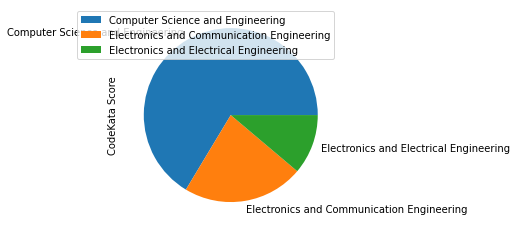

In [39]:
df.groupby(['Department']).sum().plot(kind='pie', y='CodeKata Score')

Department wise toppers (horizantal bar graph or any visual representations of your choice)

<AxesSubplot:title={'center':'Department wise toppers based on Codekata Scores'}, ylabel='Department'>

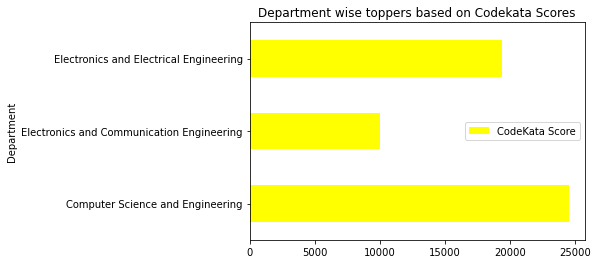

In [53]:
df_cse = df[df['Department']=='Computer Science and Engineering']
topper_cse=df_cse.nlargest(1, ['CodeKata Score'])
df_ece = df[df['Department']=='Electronics and Communication Engineering']
topper_ece=df_ece.nlargest(1, ['CodeKata Score'])
df_eee = df[df['Department']=='Electronics and Electrical Engineering']
topper_eee=df_eee.nlargest(1, ['CodeKata Score'])
top = [topper_cse,topper_ece,topper_eee]
toppers=pd.concat(top)
toppers.plot.barh(x='Department', y='CodeKata Score',
             title='Department wise toppers based on Codekata Scores', color='Yellow')